1. Exploratory Data Analysis (EDA):

   Start by exploring the dataset to understand its structure and contents. Check the number of rows and columns, data types, and missing values.
   Plot histograms or box plots to visualize the distributions of each numerical feature (e.g., Avg. Area Income, Avg. Area House Age, etc.).
   Use scatter plots to explore relationships between different features and the target variable (Price).

2. Data Preprocessing:

    Handle any missing or null values in the dataset by either filling them with appropriate values or removing the affected rows.
    If needed, convert categorical variables (e.g., Address) into numerical representations using techniques like one-hot encoding or    .     label encoding.

3. Feature Engineering:

    Create new relevant features that could potentially enhance predictive modeling. For example, you could calculate the average             price    per room, the ratio of bedrooms to rooms, or the distance of each property from important landmarks.

4. Data Visualization:

   Visualize the data using plots and charts to gain insights and identify patterns. For instance, you can create scatter plots or    a  .    heatmaps to understand correlations between features.

5. Predictive Modeling (Regression):

   Since the target variable (Price) is continuous, you can perform regression analysis to predict house prices based on the given   /        features.Split the dataset into training and testing sets.
   Utilize regression algorithms such as Linear Regression, Random Forest Regression, or Gradient Boosting Regression to build predictive    models.

6. Model Evaluation
   Since the target variable (Price) is continuous, you can perform regression analysis to predict house prices based on the given         
   features.Split the dataset into training and testing sets.
   Utilize regression algorithms such as Linear Regression, Random Forest Regression, or Gradient Boosting Regression to build predictive    models.

![](https://i.imgur.com/vl7xtxF.png)

<div style = "color: White; display: fill;
              border-radius: 5px;
              background-color: #3AB4F2;
              font-size: 100%;
              font-family: Verdana">
<p style = "padding: 7px;
            color: Black;">
    <ul> 📌 <b>Income</b> <br>
         📌 <b>House Age</b>  <br>
         📌 <b>Numbers of Rooms</b> <br>
         📌 <b>Number of Bath</b> <br>
         📌 <b>Population</b> <br>
         📌 <b>Address</b> <b>
         📌 <b>Price Prediction</b> <b> 
            <b></b><br><br>
    <p style = "padding: 3px;
                color: Black;">

![](https://i.imgur.com/WPXJm4c.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

![](https://i.imgur.com/BiP8Vkx.png)

In [2]:
df = pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


![](https://i.imgur.com/8nbAftN.png)

In [3]:
## Check the shape of dataset
df.shape

(5000, 7)

In [4]:
##check the Null values in dataset
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [5]:
# Check for duplicate rows in the entire DataFrame
df.duplicated().sum()


0

In [6]:
##A home has more bedrooms than washrooms, and the column 'Avg. Area Number of Bedrooms' represents the smaller number of rooms designated as 'Number of Washrooms' 
df = df.rename(columns ={'Avg. Area Income':'Income','Avg. Area House Age':'House Age','Avg. Area Number of Rooms':'Number of Rooms',
                          'Avg. Area Number of Bedrooms':'Number of Bath','Area Population':'Population'})

In [7]:
df['Income']  = df['Income'].astype(str)
df['Price']   = df['Price'].astype(str)

In [8]:
df['Address'].unique()

array(['208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101',
       '188 Johnson Views Suite 079\nLake Kathleen, CA 48958',
       '9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489', ...,
       '4215 Tracy Garden Suite 076\nJoshualand, VA 01707-9165',
       'USS Wallace\nFPO AE 73316',
       '37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595'],
      dtype=object)

In [9]:
df['Address'].nunique()

5000

In [10]:
##there is not any importance of address so delete this column
df = df.drop(columns ='Address')

In [11]:
df['Income']  = df['Income'].str.replace(',','').astype(float)
df['Price']   = df['Price'].str.replace(',','').astype(float)

In [12]:
df['Income']             =     df['Income'].apply(int)
df['House Age']          =     df['House Age'].apply(int)         
df['Number of Rooms']    =     df['Number of Rooms'].apply(int)
df['Number of Bath']     =     df['Number of Bath'].apply(int)
df['Population']         =     df['Population'].apply(int)
df['Price']              =     df['Price'].apply(int)


In [13]:
df.head()

,Income,House Age,Number of Rooms,Number of Bath,Population,Price
0,79545,5,7,4,23086,1059033
1,79248,6,6,3,40173,1505890
2,61287,5,8,5,36882,1058987
3,63345,7,5,3,34310,1260616
4,59982,5,7,4,26354,630943


In [14]:
## 5  number Summary
df.describe()

,Income,House Age,Number of Rooms,Number of Bath,Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5.000000e+03
mean,68582.614400,5.481000,6.492200,3.732400,36163.01500,1.232072e+06
std,10657.985126,1.034144,1.048503,1.225843,9925.64664,3.531176e+05
min,17796.000000,2.000000,3.000000,2.000000,172.00000,1.593800e+04
25%,61480.250000,5.000000,6.000000,3.000000,29403.75000,9.975765e+05
50%,68804.000000,5.000000,7.000000,4.000000,36199.00000,1.232669e+06
75%,75783.000000,6.000000,7.000000,4.000000,42861.00000,1.471210e+06
max,107701.000000,9.000000,10.000000,6.000000,69621.00000,2.469065e+06


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Income           5000 non-null   int64
 1   House Age        5000 non-null   int64
 2   Number of Rooms  5000 non-null   int64
 3   Number of Bath   5000 non-null   int64
 4   Population       5000 non-null   int64
 5   Price            5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


![](https://i.imgur.com/NoGC4qm.png)

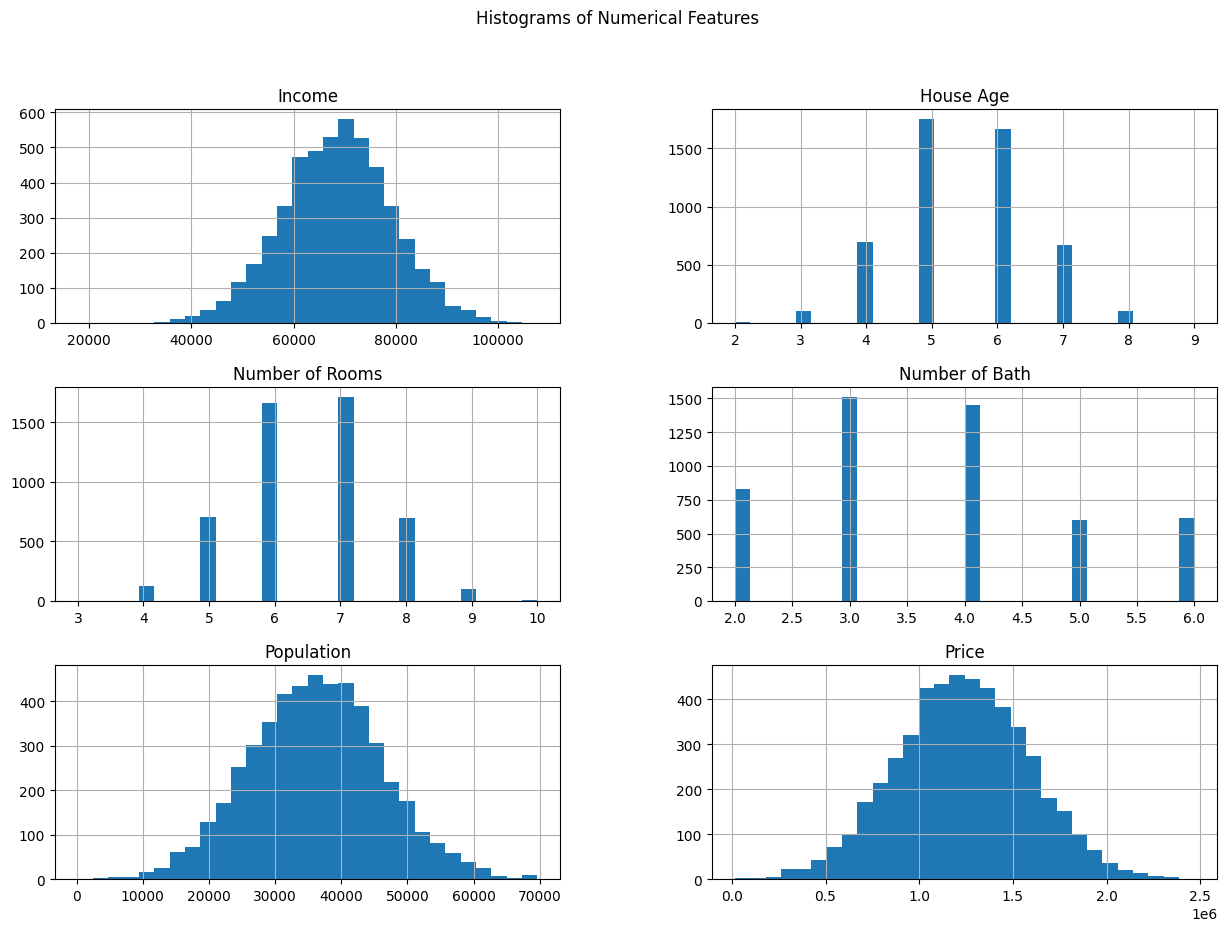

In [16]:
# Plot histograms for numerical features
numerical_features = ['Income', 'House Age', 'Number of Rooms',
                      'Number of Bath', 'Population', 'Price']

df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

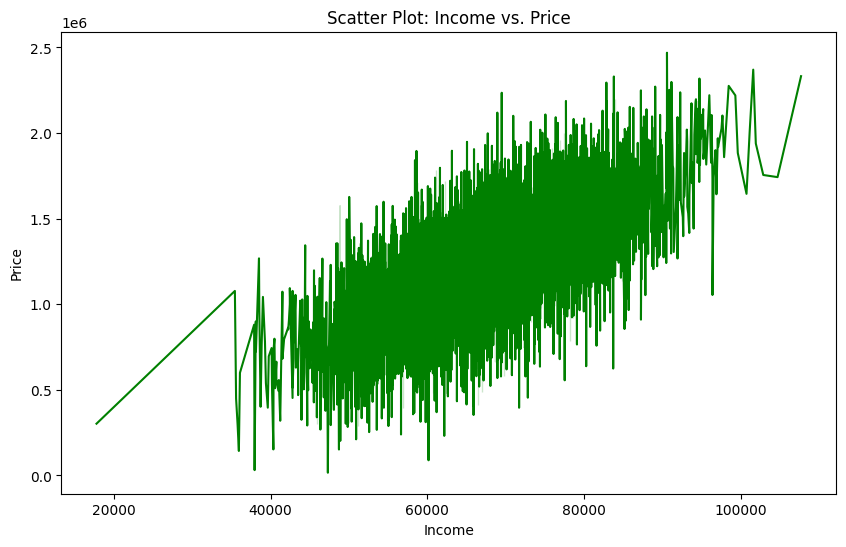

In [17]:
# Use scatter plots to explore relationships between features and target variable (Price)
plt.figure(figsize=(10, 6),dpi=100)
sns.lineplot(x='Income', y='Price',color='green' ,data=df)
plt.title("Scatter Plot: Income vs. Price")
plt.show()

In [18]:
df.head()

,Income,House Age,Number of Rooms,Number of Bath,Population,Price
0,79545,5,7,4,23086,1059033
1,79248,6,6,3,40173,1505890
2,61287,5,8,5,36882,1058987
3,63345,7,5,3,34310,1260616
4,59982,5,7,4,26354,630943


## House Age vs Price 

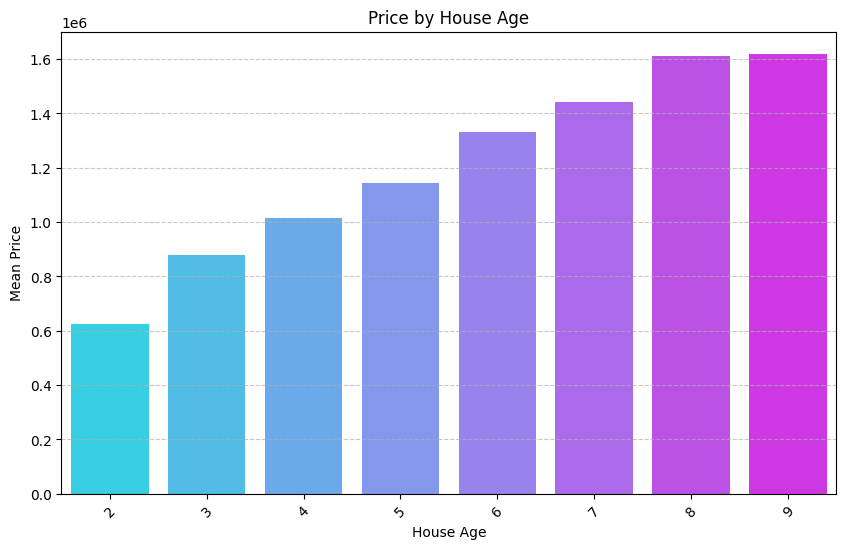

In [19]:
# Create a bar plot showing the mean Price for each unique House Age
plt.figure(figsize=(10, 6), dpi=100)
sns.barplot(x='House Age', y='Price', data=df, ci=None, palette='cool')
plt.title('Price by House Age')
plt.xlabel('House Age')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



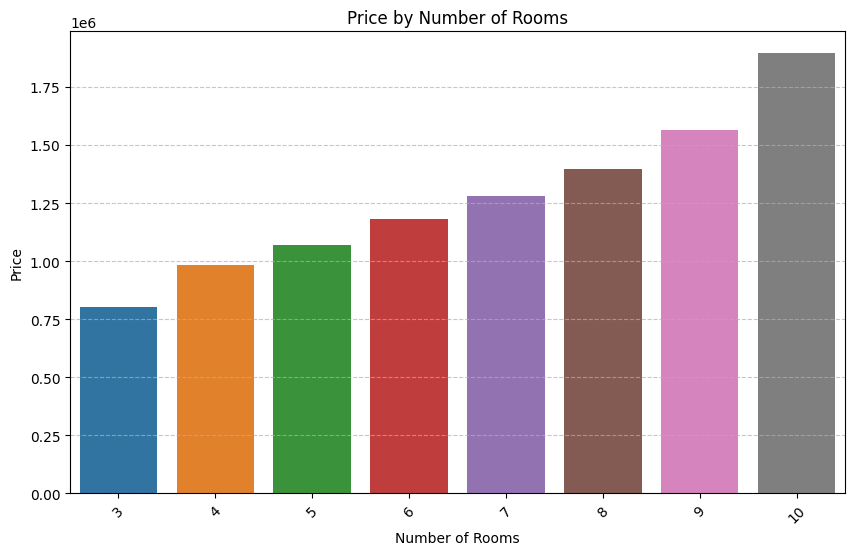

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x='Number of Rooms',y= 'Price',data = df,ci = None)
plt.title('Price by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


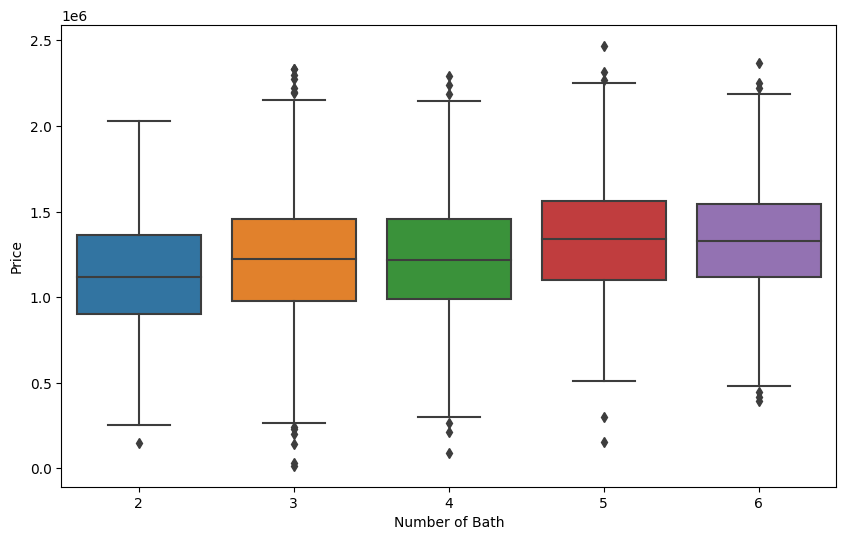

In [21]:
plt.figure(figsize=(10,6),dpi =100)
sns.boxplot(x = 'Number of Bath',y = 'Price',data= df)
plt.show()

<AxesSubplot: >

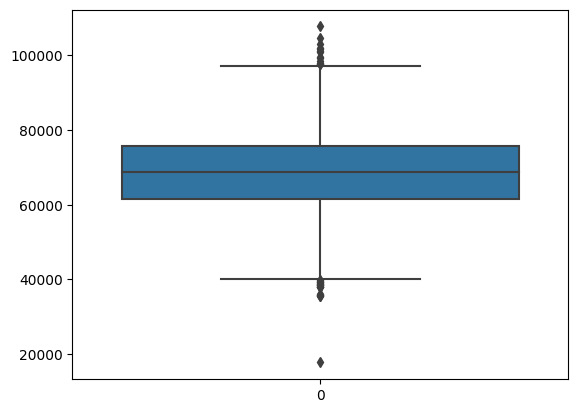

In [22]:
sns.boxplot(df['Income'])

<AxesSubplot: >

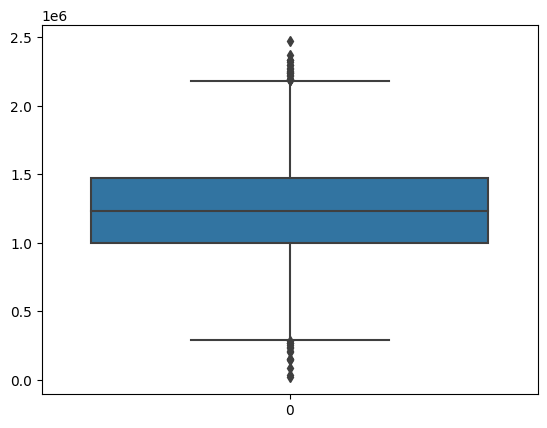

In [41]:
sns.boxplot(df['Price'])

<AxesSubplot: >

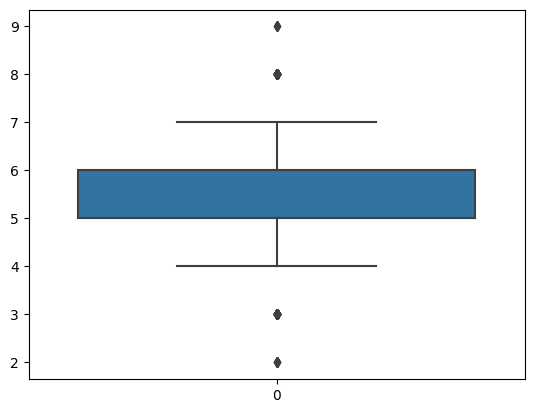

In [42]:
sns.boxplot(df['House Age'])

<AxesSubplot: >

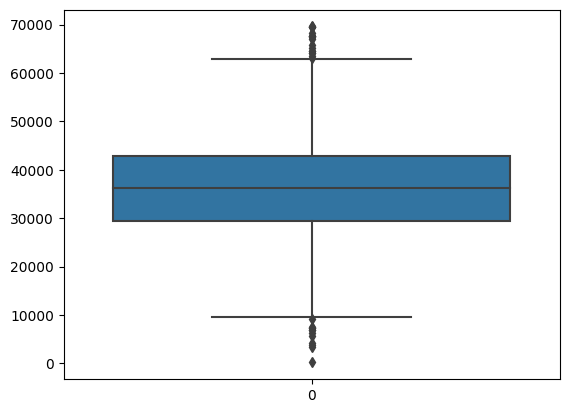

In [44]:
sns.boxplot(df['Population'])
		

## Heat Map

1. Income and Price:  positive correlation (0.64)
2. House Age and Price: Weak positive correlation (0.45)
3. Number of Rooms and Price: Weak positive correlation (0.33)
4. Number of Washrooms and Price: Weak positive correlation (0.17)
5. Population and Price: positive correlation (0.41)

In [23]:
## Price is the our Target Variable We get relation with other vaiable
df.corr()['Price']

Income             0.639734
House Age          0.439171
Number of Rooms    0.325114
Number of Bath     0.172429
Population         0.408556
Price              1.000000
Name: Price, dtype: float64

<AxesSubplot: >

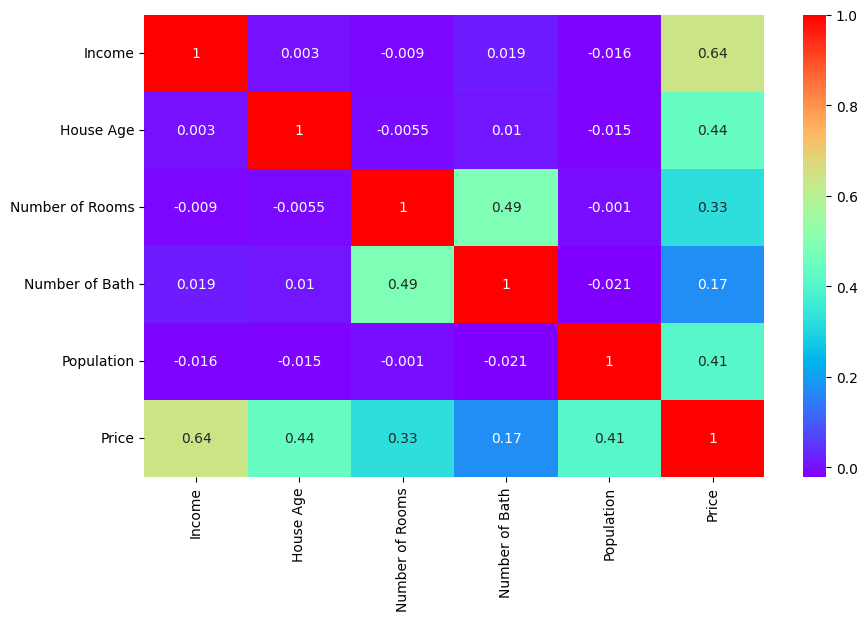

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

## Target Variable Selection
Price is our target variable, and all the other features influence it. The extent of their impact varies depending on the type of variable.

In [25]:
df.head(5)

,Income,House Age,Number of Rooms,Number of Bath,Population,Price
0,79545,5,7,4,23086,1059033
1,79248,6,6,3,40173,1505890
2,61287,5,8,5,36882,1058987
3,63345,7,5,3,34310,1260616
4,59982,5,7,4,26354,630943


In [26]:
X = df.drop(columns ='Price')
y = df[['Price']]

In [27]:
X.head(1)

,Income,House Age,Number of Rooms,Number of Bath,Population
0,79545,5,7,4,23086


In [28]:
y.head()

,Price
0,1059033
1,1505890
2,1058987
3,1260616
4,630943


![](https://i.imgur.com/bZn8N2J.png)

## Scale the Input Features by using StandardScaler

In [29]:
# Data Preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [30]:
X

array([[ 1.02866366, -0.4651657 ,  0.48435786,  0.21832061, -1.31762931],
       [ 1.00079444,  0.50191475, -0.46947802, -0.59752621,  0.4040428 ],
       [-0.68458944, -0.4651657 ,  1.43819375,  1.03416742,  0.07244434],
       ...,
       [-0.48725286,  1.46899521, -2.3771498 , -1.41337302, -0.29190086],
       [-0.05457622, -0.4651657 ,  0.48435786,  1.03416742,  0.65110431],
       [-0.28832107, -0.4651657 , -0.46947802,  0.21832061,  1.04164689]])

In [31]:
y = scaler.fit_transform(y)

In [32]:
y

array([[-0.49008164],
       [ 0.77550712],
       [-0.49021192],
       ...,
       [-0.57024425],
       [-0.09464126],
       [ 0.18941149]])

![](https://i.imgur.com/lUO8zIo.png)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train.shape :",X_train.shape)
print("y_train.shape :",y_train.shape)
print("X_test.shape  :",X_test.shape)
print("y_test.shape  :",y_test.shape)

X_train.shape : (4000, 5)
y_train.shape : (4000, 1)
X_test.shape  : (1000, 5)
y_test.shape  : (1000, 1)


## **1.  Linear Regression**

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
# Choose a model (e.g., Linear Regression)
model  = LinearRegression()
# Train the model using the training data
model.fit(X_train,y_train)
# Make predictions on the testing data
y_pred = model.predict(X_test)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2 score)
r2 = r2_score(y_test, y_pred)
print("R-squared:         ", r2)

Mean Squared Error: 0.10930285508395682
R-squared:          0.8892448983900704


## **2.  Decision tree Regressor**

In [35]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth =100,random_state=42)
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2 score)
r2 = r2_score(y_test, y_pred)
print("R-squared:         ", r2)


Mean Squared Error: 0.2729054690691816
R-squared:          0.7234685870424334


## 3. Random forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 1000,max_depth =1000,random_state=42)
rf_reg.fit(X_train,y_train)
y_pred = rf_reg.predict(X_test)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:      ", mse)

# Calculate R-squared (R2 score)
r2 = r2_score(y_test, y_pred)
print("R-squared:               ", r2)


Mean Squared Error:       0.15404657029473207
R-squared:                0.8439066982051922


## 4.  Gradient boosting Regressor

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2 score)
r2 = r2_score(y_test, y_pred)
print("R-squared:         ", r2)

Mean Squared Error: 0.12157924138104358
R-squared:          0.8768054025444019


In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Without Feature Scaling
model_no_scaling = GradientBoostingRegressor()
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
mse_no_scaling = mean_squared_error(y_test, y_pred_no_scaling)
print("MSE without feature scaling:", mse_no_scaling)

# With Only Feature Scaling (Without Target Variable)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_feature_scaling = GradientBoostingRegressor()
model_feature_scaling.fit(X_train_scaled, y_train)
y_pred_feature_scaling = model_feature_scaling.predict(X_test_scaled)
mse_feature_scaling = mean_squared_error(y_test, y_pred_feature_scaling)
print("MSE with only feature scaling:", mse_feature_scaling)

# With Feature and Target Variable Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

model_both_scaling = GradientBoostingRegressor()
model_both_scaling.fit(X_train_scaled, y_train_scaled)
y_pred_both_scaling = model_both_scaling.predict(X_test_scaled)
mse_both_scaling = mean_squared_error(y_test_scaled, y_pred_both_scaling)
print("MSE with both feature and target variable scaling:", mse_both_scaling)

# Display the Ranking
mse_values = [mse_no_scaling, mse_feature_scaling, mse_both_scaling]
models = ["Without Scaling", "With Only Feature Scaling", "With Both Scaling"]

ranking = sorted(zip(mse_values, models), key=lambda x: x[0])
for rank, (mse, model) in enumerate(ranking, start=1):
    print(f"{rank}. {model}: MSE = {mse:.2f}")


MSE without feature scaling: 0.12158039349149605
MSE with only feature scaling: 0.12161059130126821
MSE with both feature and target variable scaling: 0.12128206185672709
1. With Both Scaling: MSE = 0.12
2. Without Scaling: MSE = 0.12
3. With Only Feature Scaling: MSE = 0.12


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Without Feature Scaling
model_no_scaling = LinearRegression()
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
mse_no_scaling = mean_squared_error(y_test, y_pred_no_scaling)
print("MSE without feature scaling:", mse_no_scaling)

# With Only Feature Scaling (Without Target Variable)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_feature_scaling = LinearRegression()
model_feature_scaling.fit(X_train_scaled, y_train)
y_pred_feature_scaling = model_feature_scaling.predict(X_test_scaled)
mse_feature_scaling = mean_squared_error(y_test, y_pred_feature_scaling)
print("MSE with only feature scaling:", mse_feature_scaling)

# With Feature and Target Variable Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)
model_both_scaling = LinearRegression()
model_both_scaling.fit(X_train_scaled, y_train_scaled)
y_pred_both_scaling = model_both_scaling.predict(X_test_scaled)
mse_both_scaling = mean_squared_error(y_test_scaled, y_pred_both_scaling)
print("MSE with both feature and target variable scaling:", mse_both_scaling)

# Display the Ranking
mse_values = [mse_no_scaling, mse_feature_scaling, mse_both_scaling]
models = ["Without Scaling", "With Only Feature Scaling", "With Both Scaling"]

ranking = sorted(zip(mse_values, models), key=lambda x: x[0])
for rank, (mse, model) in enumerate(ranking, start=1):
    print(f"{rank}. {model}: MSE = {mse:.2f}")


MSE without feature scaling: 0.10930285508395682
MSE with only feature scaling: 0.10930285508395685
MSE with both feature and target variable scaling: 0.10897285702629148
1. With Both Scaling: MSE = 0.11
2. Without Scaling: MSE = 0.11
3. With Only Feature Scaling: MSE = 0.11


In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Without Feature Scaling
model_no_scaling = DecisionTreeRegressor()
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
mse_no_scaling = mean_squared_error(y_test, y_pred_no_scaling)
print("MSE without feature scaling:", mse_no_scaling)

# With Only Feature Scaling (Without Target Variable)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_feature_scaling = DecisionTreeRegressor()
model_feature_scaling.fit(X_train_scaled, y_train)
y_pred_feature_scaling = model_feature_scaling.predict(X_test_scaled)
mse_feature_scaling = mean_squared_error(y_test, y_pred_feature_scaling)
print("MSE with only feature scaling:", mse_feature_scaling)

# With Feature and Target Variable Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

model_both_scaling = DecisionTreeRegressor()
model_both_scaling.fit(X_train_scaled, y_train_scaled)
y_pred_both_scaling = model_both_scaling.predict(X_test_scaled)
mse_both_scaling = mean_squared_error(y_test_scaled, y_pred_both_scaling)
print("MSE with both feature and target variable scaling:", mse_both_scaling)

# Display the Ranking
mse_values = [mse_no_scaling, mse_feature_scaling, mse_both_scaling]
models = ["Without Scaling", "With Only Feature Scaling", "With Both Scaling"]

ranking = sorted(zip(mse_values, models), key=lambda x: x[0])
for rank, (mse, model) in enumerate(ranking, start=1):
    print(f"{rank}. {model}: MSE = {mse:.2f}")


MSE without feature scaling: 0.27182538737324236
MSE with only feature scaling: 0.27910354887465655
MSE with both feature and target variable scaling: 0.2713471242326199
1. With Both Scaling: MSE = 0.27
2. Without Scaling: MSE = 0.27
3. With Only Feature Scaling: MSE = 0.28
